In this notebook, we will be learning how to process an observation of the H1 line of the Milky Way taken with the RMSC Planeterium's Horn Radio Telescope.  

First, we need to import some Python packages (code other people have already written so we don't have to reinvent the wheel every time we code). 

The first package we need to import is *pandas*. This package allows us to organize our data into something called a data frame, which works a little bit like a Google spreadsheet. 

The second package is *matplotlib.pyplot*, which will allow us to create plots to help look at our observations.

Finally, we have to import the package *numpy*, which is short for numerical python. This allows us to perform mathematical operations on our data. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

Next, we need to import our data, which you can find on my GitHub page: https://github.com/livsguidetothegalaxy/Telescope_data_test. I've already done this for you below, but to get the data, click on one of the files in the repository, and then click on the button that says "RAW" on the right-hand side of the page. This will open the data file in a new window. Copy the link that is in the search bar at the top of this new window. It should look like the link below. This link will tell Python where to look for our data. But we have to assign this link to a variable we can use to call that data into our notebook. 

We accomplish this below for the first datafile by assigning the link to a variable name "url". Not that the link to the data is enclosed within single quotation marks. This is so Python reads it as one item instead of individual letters and symbols.  

Once we have the link in a format Python can read, we still have to call the data into our notebook so we can use it. We do this using pandas and bring the data into our notebook as a dataframe we will call "df1". 

In [ ]:
url = 'https://raw.githubusercontent.com/livsguidetothegalaxy/Telescope_data_test/main/2022-12-21_18.08.12.9_Anytown_0_0_spectrum.csv'
df1 = pd.read_csv(url)

If we print our dataframe using print(df1), we will see that there are two columns, the first column is our frequency data from our telescope and the second column is the amplitude data. We want to be able to plot these two sets of data against each other so we can look at our observations. To do this, we need to turn the columns into numpy arrays. We do this below. Note that counting in Python starts at 0, not 1. So that means our first column is labeled 0 instead of one. 

What this code does is located the column in our dataframe (.iloc locates the column selected using [:,0], which means give us all of the elements in the first column). Once the data is located in the dataframe, we convert the column into a numpy array using .to_numpy().  

In [ ]:
frequency = df1.iloc[:, 0].to_numpy()
amplitude  = df1.iloc[:,1].to_numpy()

Now, let's plot our data using matplotlib.

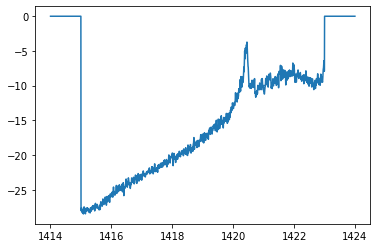

In [ ]:
plt.plot(frequency, amplitude)
plt.show()

This is our observation as recorded in our data files directly from the telescope. We can see the little spike around 1420 MHz where we expect to see the peak of the H1 line, but this plot is pretty messy. The first thing we want to do is cut off the parts of the plot that are flatlined at zero at the beginning and end of the observation. We want to make sure that we take the same amount of data away from both arrays. The code below is telling python to return only the parts of the array between the first 500 points in the array and the last 500 points in the array. We then plot these arrays again to see if we have trimmed them down enough. 

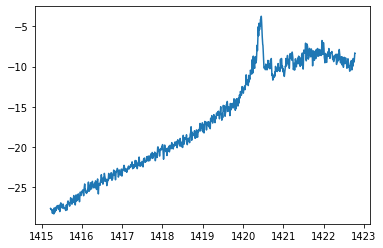

In [ ]:
frequency = frequency[500: len(frequency) - 500]
amplitude = amplitude[500: len(amplitude) - 500]

plt.plot(frequency, amplitude)
plt.show()

The flatlined parts of the plot are gone! But now we see that our amplitudes are all below zero, which doesn't make any sense for signal detection. This is because we didn't calibrate the telescope before taking our data. But we can fix this now, by taking away adding the smallest value (in this case, the absolute value of the minimum because they are all negative values) in the array to each element in the array to bring them all up above zero.

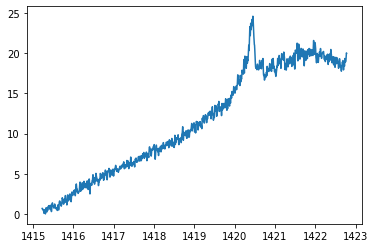

In [ ]:
amplitude = amplitude + abs(min(amplitude))


plt.plot(frequency, amplitude)
plt.show()

We now have values above zero, but we now want to normalize the data. This means we keep all the values between 0 and 1. We do this by now dividing the amplitude array by the maximum value.

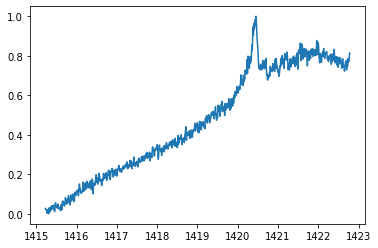

In [ ]:
amplitude = amplitude/(max(amplitude))


plt.plot(frequency, amplitude)
plt.show()

We now have normalized data with no odd artifacts at the beginning or end of our observation. But it's still a little bit difficult to see the H1 peak. We now want to "zoom in" on that section of the plot. We are going to use a similar method that we used above to chop off the ends of the plot, but this time, we need to find out where the peak in the data is.

We can do this by using the numpy command argmax. This returns the location of the highest point in our data, which is now the H1 peak. 

Once we have the location of the peak, we want to cut the observation down to just 300 points before the peak and 300 points after. make sure you do this to both arrays, so they stay the same length. 

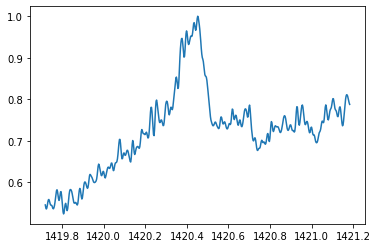

In [ ]:
loc_of_peak = np.argmax(amplitude)

peak_window_amp = amplitude[loc_of_peak - 300: loc_of_peak + 300]
peak_window_freq = frequency[loc_of_peak - 300: loc_of_peak + 300]


plt.plot(peak_window_freq, peak_window_amp)
plt.show()



Ok! Now that we can see our peak better, we want to determine if the H1 line we detected is at the frequency we expect it to be, or if it's been red or blue shifted due to our galaxy's motion. To do this, we first want to create a variable to hold the expected frequency of the H1 line. I chose the variable name "neu_hy" to stand for neutral hydrogen, another name for H1.

We also want to find the frequency at which our data peaks, which will be the H1 line for our observation. We do this by again using argmax(), but this time, we do it of our amplitude array and use it to point to the location in the frequency array by using peak_window_freq[np.argmax(peak_window_amp)], which tells Python to return the frequency value in the frequency array that is at the same location of the peak of the amplitude array. 

In [ ]:
neu_hy = 1420.4058

freq_of_peak = peak_window_freq[np.argmax(peak_window_amp)]

We now want to spruce up our plot a bit, add a title, add labels on the axis, and point out the location of the expected vs detected peak of the H1 line.

First, we want to use something called an "if" statement to plot the line showing the location of our detected peak to be blue if it is blue-shifted, and red if it is red-shifted. An "if" statement tells Python that if something is true, then do something, in this case, plot a line at the detected peak. Also, note here that "if" statements have a special structure. The "if" part of the statement is level with the rest of our code, but what we tell Python to do if that statement is true is indented. 

We also have an "else" statement after our two "if" statements. We still want to label our peak if it's equal to what we expect to see! This "else" statement tells Python that if our detected peak is not greater or less than what we expect (meaning that it would be equal), we want to plot this line as a black line that will be at the same location as we expect it to be. 

Here, we are using plt.axvline() to plot a line down our plot in the location of our detected peak, freq_of_peak. We tell it what color we want the line to be and label the line. To insert variables into written English labels, we use .format(name_of_varible_we_want_to_use), with the {}, telling Python where we want to put the value of that variable. 

In English, the "if" statement below reads:

if the frequency of our detected peak is greater than the frequency expected from H1:
    plot a blue line at the location of the detected peak and label it with the frequency of the peak

if the frequency of our detected peak is less than the frequency expected from H1:
    plot a red line at the location of the detected peak and label it with the frequency of the peak




We also want to add a line at the location we expect the H1 peak to be if our data isn't blue or red-shifted. We add this in just as we did for our detected location above, but for this one, I choose to make the line black and use the expected frequency for the H1 peak: neu_hy.




Now, we want to plot our data as before using plt.plot(). We add labels for the x and y axis using plt.xlabel() and plt.ylabel() respectively. We add a title for our plot using plt.title(). We make sure that the labels for our lines are plotted by using plt.legend(). Finally, we tell Python to plot all of these things on one plot using plt.show()

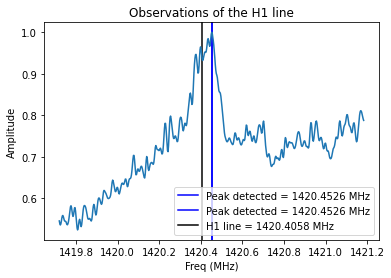

In [ ]:


if freq_of_peak > neu_hy:
   plt.axvline(x = freq_of_peak, color = 'b', label = 'Peak detected = {} MHz'.format(freq_of_peak))
if freq_of_peak <  neu_hy:
   plt.axvline(x = freq_of_peak, color = 'r', label = 'Peak detected = {} MHz'.format(freq_of_peak))

else: 
     plt.axvline(x = freq_of_peak, color = 'b', label = 'Peak detected = {} MHz'.format(freq_of_peak))


plt.axvline(x = neu_hy, color = 'black', label = 'H1 line = {} MHz'.format(neu_hy))


plt.plot(peak_window_freq, peak_window_amp) 
plt.xlabel("Freq (MHz)")
plt.ylabel("Amplitude")
plt.title("Observations of the H1 line")
plt.legend()
plt.show()


Great job! You have now processed an observation from the RMSC Planeterium's Horn Radio Telescope, and shown that for this observation, a blue-shift of the H1 line was detected! This means that you have shown that the part of the galaxy looked at for this observation was moving away from the earth! 